In [1]:
import geopandas as gpd
from shapely.geometry import Polygon
#import functions from my fetch script
from fetch import geo_fetch,geo_plot

<h2>Task 1 - Data Fetching and Loading</h2>

* The LIDAR high definition elevation contains data that would be useful to build models of water flow and predict plant health and maize harvest
* The task is to write a modular python code/package to connect to the API, query the data model to select with  a specified input and get a desired output. 
* For example, submit a boundary (GPS coordinates polygon) and receive back the elevation point data.

In [2]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

df = gpd.GeoDataFrame([polygon], columns=["geometry"])
df = df.set_crs(epsg=4326)

In [3]:
#geo_fetch takes 2 inputs in, the a geopandas dataframe containing the bounds the region and outputs a geopandas 
#dataframe with columns elevation 

gdf = geo_fetch(df,"IA_FullState/")
gdf.head()

writers.gdal: Grid width out of range.
RunTime Error, writing 0s and moving to next bounds


,elevation,geometry
0,306.51519775390625,POINT (-10436886.930 5149216.890)
1,306.44091796875,POINT (-10436885.930 5149216.890)
2,306.41668701171875,POINT (-10436884.930 5149216.890)
3,306.449859619140625,POINT (-10436883.930 5149216.890)
4,306.4075927734375,POINT (-10436882.930 5149216.890)


In [4]:
gdf.shape

(501802, 2)

In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 501802 entries, 0 to 501801
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   elevation  501802 non-null  object  
 1   geometry   501802 non-null  geometry
dtypes: geometry(1), object(1)
memory usage: 7.7+ MB


In [6]:
#convert elevation column from object to float
gdf.elevation = gdf.elevation.astype(float)

<h2>Task 2 - Terrain Visualization</h2>

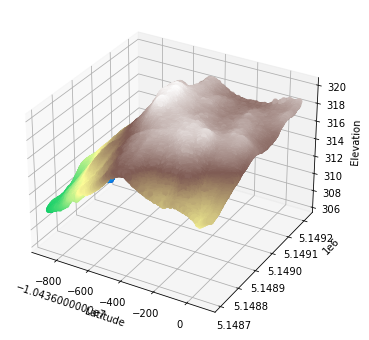

In [9]:
geo_plot(gdf)